В этом блоке проанализируем А/Б тест

Мы добавили на лендинг с оформлением дебетовой карты (https://www.tinkoff.ru/cards/debit-cards/tinkoff-black/) информацию о дополнительных кэшбеках, которые появляются благодаря нашим патнерам. Рассчитываем, что это вырастит конверсию из переходов на лендинг в оформление дебетовой карты. 

В приложенном файле вам доступны логи переходов на сайт и последующего оформления карточки за каждый день. 

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats


In [2]:

df = pd.read_csv('hw_ab.csv')
df

,date,id,group,converted
0,2023-08-01,5030836,control,0
1,2023-08-01,5091425,control,0
2,2023-08-01,5106537,control,0
3,2023-08-01,4556522,control,0
4,2023-08-01,4002917,control,0
...,...,...,...,...
94773,2023-11-01,7729860,test,0
94774,2023-11-01,8088716,test,0
94775,2023-11-01,4478281,test,0
94776,2023-11-01,5710762,test,0


In [3]:
# date — дата захода пользователя на лендинг
# id — идентификатор, присвоенный пользователю
# group — группа теста или контроля
# converted – 1, если пользователь оформил карточку и 0, если не оформил
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94778 entries, 0 to 94777
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       94778 non-null  object
 1   id         94778 non-null  int64 
 2   group      94778 non-null  object
 3   converted  94778 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.9+ MB


In [5]:
# убедитесь,что пользователи уникальные
df['id'].nunique()

94778

In [4]:
# пользователей в тесте и контрле приблизительно равное количество, 
# в каждой группе каждый день теста были пользователи, и они как оформляли карту, так и нет
df.groupby('group').nunique()

,date,id,converted
group,,,
control,93,47330,2
test,93,47448,2


In [5]:

df[['group','converted','id']].groupby(['group','converted']).count()


id
group   converted       
control 0          42408
        1           4922
test    0          41774
        1           5674

In [6]:
# конверсия в контроле: 
4922/(42408+4922)

0.10399323896049018

In [7]:
# конверсия в тесте: 
5674/(41774+5674)

0.11958354409037261

In [8]:
# отношение конверсий: 

conv_test = 5674 # число открытых карт в тесте
seen_test = 41774+5674 # общее число наблюдений в тесте, это число заходов на лендинг

conv_control = 4922 # число открытых карт в контроле
seen_control = 42408+4922 # общее число наблюдений в контроле, это число заходов на лендинг

print((conv_test/seen_test)/(conv_control/seen_control)-1)

0.14991652616768292


In [9]:

from scipy.stats import binomtest

result = binomtest(conv_test, seen_test-conv_test, conv_control/(seen_control-conv_control)) # используйте документацию, чтобы с помощью conv_test,seen_test,conv_control,seen_control получить результат теста
result.pvalue

6.512476313977771e-35

In [10]:
# количество дней теста
df['date'].nunique()


93

In [11]:
res_by_day = df[['group','converted','date']].groupby(['group','date'], as_index=False).sum()
res_by_day # делаем табличку, где для каждого дня считаем количество конверсий (а ниже - и среднего)

,group,date,converted
0,control,2023-08-01,45
1,control,2023-08-02,63
2,control,2023-08-03,60
3,control,2023-08-04,56
4,control,2023-08-05,54
...,...,...,...
181,test,2023-10-28,58
182,test,2023-10-29,67
183,test,2023-10-30,58
184,test,2023-10-31,68


In [12]:
res_by_day_conv = df[['group','converted','date']].groupby(['group','date'], as_index=False).mean()
res_by_day_conv

,group,date,converted
0,control,2023-08-01,0.087891
1,control,2023-08-02,0.123047
2,control,2023-08-03,0.109689
3,control,2023-08-04,0.115226
4,control,2023-08-05,0.105263
...,...,...,...
181,test,2023-10-28,0.109434
182,test,2023-10-29,0.124535
183,test,2023-10-30,0.120833
184,test,2023-10-31,0.133858


(0.0, 100.0)

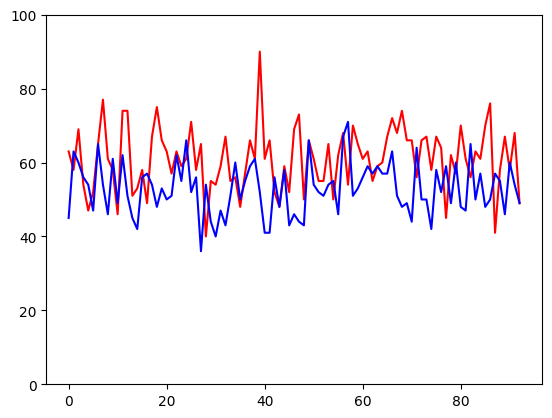

In [13]:

test_n_by_date = list(res_by_day.loc[res_by_day['group']=='test']['converted']) # количество открытых карт и средние конверсии по дням в тесте
control_n_by_date = list(res_by_day.loc[res_by_day['group']=='control']['converted']) # количество открытых карт и средние конверсии по дням в контроле

sns.lineplot(data= test_n_by_date, color = "red")
sns.lineplot(data= control_n_by_date, color ="blue")

plt.ylim(0, 100)

(0.0, 0.2)

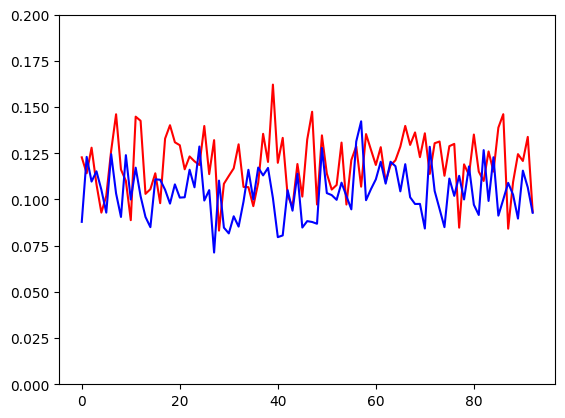

In [14]:

test_conv_by_date = list(res_by_day_conv.loc[res_by_day_conv['group']=='test']['converted']) # конверсия из посещений в оформленние карт по дням в тесте
control_conv_by_date = list(res_by_day_conv.loc[res_by_day_conv['group']=='control']['converted']) # конверсия из посещений в оформленние карт по дням в контроле
sns.lineplot(data= test_conv_by_date, color = "red")
sns.lineplot(data= control_conv_by_date, color ="blue")

plt.ylim(0, 0.2)


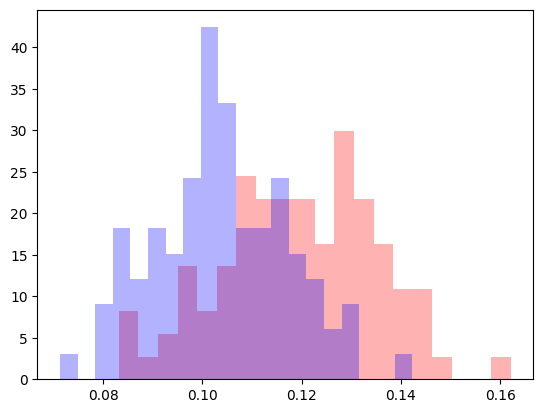

In [15]:
# видим, что распределения средних значений по дням в тесте и в контроле похожи на нормальные

plt.hist(test_conv_by_date, 20, density=True,color='r',alpha=0.3 )
plt.hist(control_conv_by_date, 20, density=True,color='b',alpha=0.3 )

plt.show()

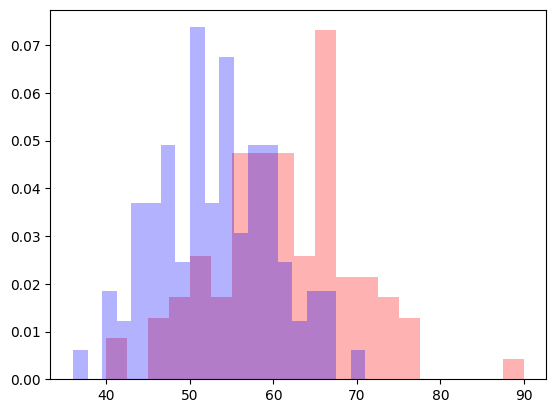

In [16]:
plt.hist(test_n_by_date, 20, density=True,color='r',alpha=0.3 )
plt.hist(control_n_by_date, 20, density=True,color='b',alpha=0.3 )

plt.show()

In [17]:

from scipy.stats import ttest_ind

ttest_ind(test_conv_by_date, control_conv_by_date) # используйте документацию, test_conv_by_date, control_conv_by_date, чтобы провести тест


TtestResult(statistic=7.209029622736518, pvalue=1.4124701519287306e-11, df=184.0)

In [18]:

ttest_ind(test_n_by_date, control_n_by_date) # используйте документацию, test_n_by_date, control_n_by_date, чтобы провести тест

TtestResult(statistic=7.048113433738303, pvalue=3.529180601649641e-11, df=184.0)

In [19]:
# получаем, что по ttest средние по дням конверсии отличаются значимо